<a href="https://colab.research.google.com/github/Vinh1207/Phan-Cao-Vinh/blob/main/Nhandienhoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/Nhandienhoa/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 838 images belonging to 3 classes.


In [5]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/Nhandienhoa/Valid',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 300 images belonging to 3 classes.


In [6]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(150,150,3),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=10,batch_size=128,verbose=1, validation_data=test_set)

Epoch 1/10
27/27 [==============================] - 221s 8s/step - loss: 1.0905 - accuracy: 0.4391 - val_loss: 0.7836 - val_accuracy: 0.6600
Epoch 2/10
27/27 [==============================] - 55s 2s/step - loss: 0.7410 - accuracy: 0.6599 - val_loss: 0.7542 - val_accuracy: 0.6000
Epoch 3/10
27/27 [==============================] - 52s 2s/step - loss: 0.6556 - accuracy: 0.7172 - val_loss: 0.7751 - val_accuracy: 0.6300
Epoch 4/10
27/27 [==============================] - 53s 2s/step - loss: 0.6062 - accuracy: 0.7327 - val_loss: 0.7791 - val_accuracy: 0.6500
Epoch 5/10
27/27 [==============================] - 54s 2s/step - loss: 0.5614 - accuracy: 0.7613 - val_loss: 0.8476 - val_accuracy: 0.5600
Epoch 6/10
27/27 [==============================] - 53s 2s/step - loss: 0.5016 - accuracy: 0.7959 - val_loss: 0.7830 - val_accuracy: 0.6333
Epoch 7/10
27/27 [==============================] - 54s 2s/step - loss: 0.4512 - accuracy: 0.8162 - val_loss: 0.8880 - val_accuracy: 0.6267
Epoch 8/10
27/27 [=

In [8]:
model.save('Nhandienhoa.h5')

In [9]:
model_flower = load_model('Nhandienhoa.h5')

1/1 [==============================] - 0s 136ms/step
Đây là hoa: Tulip


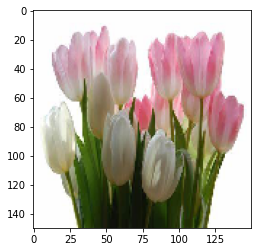

In [10]:
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('/content/hoa tulip.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_flower.predict(img)
class_name=['Rose','Sun Flower','Tulip']
m= int(np.argmax(result,axis=1))
print("Đây là hoa:", class_name[m])